In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv')

print(dataset.head())
#from sklearn.preprocessing import LabelEncoder
#encoder=LabelEncoder()
#dataset["Sleep Stage"]=encoder.fit_transform(dataset["Sleep Stage"])



  Sleep Stage  MeanP_Alpha_F4  MedianF_Alpha_F4  MeanF_Alpha_F4  \
0           W         0.00051           8.74146        18.48195   
1           W         0.00040          10.24000        17.48293   
2           W         0.00036           9.74049        17.98244   
3           W         0.00035          10.11512        17.60780   
4           W         0.00033           9.74049        17.60780   

   Spectral Edge_Alpha_F4  PeakF_Alpha_F4  MeanP_Beta_F4  MedianF_Beta_F4  \
0                17.48293         8.24195        0.00071         19.73073   
1                16.85854        10.61463        0.00051         17.23317   
2                17.48293         8.74146        0.00047         17.60780   
3                17.10829         9.61561        0.00047         17.35805   
4                17.23317         8.11707        0.00043         17.23317   

   MeanF_Beta_F4  Spectral Edge_Beta_F4  ...  MeanP_Delta_O2  \
0       29.84585               33.84195  ...         0.00724   
1     

In [4]:
X= dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [5]:
from sklearn.preprocessing import label_binarize
cls=["W", "N1", "N2","N3","R"]
y = label_binarize(y, classes=cls)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)

X_test =sc.fit_transform(X_test)

In [8]:
from sklearn.multiclass import OneVsRestClassifier

xgb_classifier = OneVsRestClassifier(xgb.XGBClassifier(max_depth=15))
xgb_classifier.fit(X_train,y_train)
predictions = xgb_classifier.predict(X_test)

In [9]:
def ROC(y_score,cls):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, auc
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(cls)):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # Plot ROC curve
    plt.figure(figsize = (10,7))
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]))
    for i in range(len(cls)):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                      ''.format(cls[i], roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()


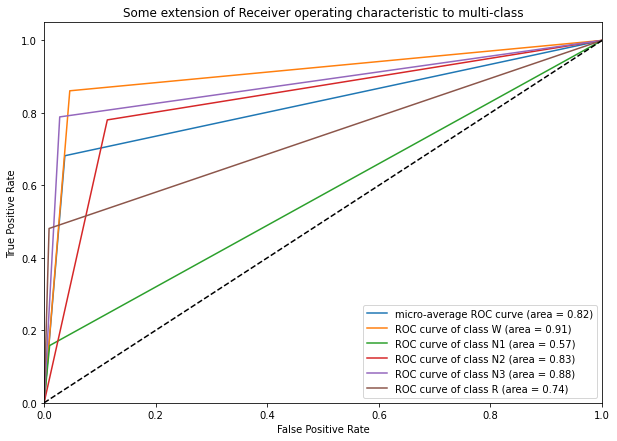

In [10]:
ROC(predictions,cls)